## Import Libraries

In [2]:
import matplotlib.pyplot as plt
from numpy import sin, cos, sqrt, pi, linspace, arange, deg2rad, rad2deg, array, arcsin, arccos,sort, argsort, argwhere, argmin, argmax, interp, concatenate, zeros
from scipy.spatial import distance
import warnings
from numpy import linalg as LA
warnings.simplefilter('ignore')

def sec(x):
    return 1/cos(x)
def tan(x):
    return sin(x)/cos(x)

## Initialize Parameters 

A :  [3.6        0.60207973 0.5       ]
B :  [-1.5        -3.32753663  0.5       ]


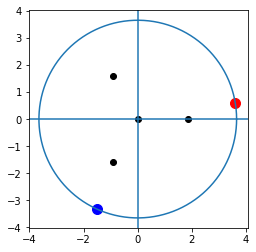

In [3]:
n      = 1.33 #-------------------------------------------- Refractive index of medium
c      = 299792458/n #------------------------------------- Speed of light in medium
R      = 7.3/2 #------------------------------------------- Radius of tank
v      = n * c #------------------------------------------- Particle Speed
times  = linspace(1e-11,1e-7,200000)
c1     = (0, 0, 0)  #------------------------------------ Central    PMT number 1 
c2     = (1.85*cos(2*pi/3) , 1.85*sin(2*pi/3), 0) #------ Non-Radial PMT number 2
c3     = (1.85*cos(4*pi/3) , 1.85*sin(4*pi/3), 0) #------ Non-Radial PMT number 3
c4     = (1.85*cos(0     ) , 1.85*sin(0     ), 0) #------ Radial     PMT number 4
xA,xB,h= 3.6,-1.5, 0.5
A      = array( [xA ,   sqrt(R**2-xA**2), h] ) #---------------- Entry Point of muon
B      = array( [xB ,  -sqrt(R**2-xB**2), h] ) #---------------- Exit point of muon
AB     = B-A #------------------------------------------------ Displacement vector of muon
nAB    = LA.norm(AB) #---------------------------------------- Path length traveled by muon
den    = c*c - v*v
angs   = linspace(0,6.28,1000)
xs,ys  = R*cos(angs), R*sin(angs)
#Plot cylinder transverse cross-section
plt.plot(xs,ys)
plt.scatter(A[0],A[1],c='r',s=100) ; plt.scatter(B[0],B[1],c='b',s=100);
plt.scatter(c1[0],c1[1],c='k'); plt.scatter(c2[0],c2[1],c='k');
plt.scatter(c3[0],c3[1],c='k'); plt.scatter(c4[0],c4[1],c='k')
plt.axhline(0)
plt.axvline(0)
plt.axis('scaled')

print('A : ', A)
print('B : ', B)

In [3]:
def entry_brightness(L,c,v,alpha,den):
    tt     = L/c
    aterm  = (c*c*tt*v-L*v*v*cos(alpha))
    bterm  = (v*v*( -L*L*v*v + c*c*L*L + c*c*tt*tt*v*v - 2*c*c*L*tt*v*cos(alpha) + L*L*v*v*cos(alpha)**2))
    xp     = (aterm + sqrt(bterm)) / den
    cterm  = (c*c*v)
    dterm  = (c*c*v*v*v*(tt*v-L*cos(alpha)))
    vp     = (cterm + (dterm/sqrt(bterm))) / den
    kp     = sqrt( L*L + xp*xp - 2*L*xp*cos(alpha) )
    betap  = alpha
    vtp    = vp*sin(betap)
    omegap = vtp / kp
    bp     = abs(omegap/(kp**2))
    return bp

def plus_t_vs_x (a, b, color, label):
    plt.plot(a, b, c=color, ls='-' , lw=2.5, label=label)
def minus_t_vs_x(a, b, color, label):
    plt.plot(a, b, c=color, ls='--', lw=2.5, label=label)
def both_t_vs_x (a1, b1, a2, b2, color, label):
    plt.plot(a1, b1, c=color, ls='-' , lw=2.5, label=label)
    plt.plot(a2, b2, c=color, ls='--', lw=2.5)
    plt.xlabel(r'time since muon entry (in ns)',fontsize=18)
    plt.ylabel(r'image distance $x_{pm}$ from entry point (in meters)', fontsize=18)
    plt.axhline(xc, c='k', ls=':')
    if detector!=4:
        plt.text(33,xc+0.05, r'$x_C$ = {}'.format(round(xc,2)), fontsize=18)
    else:
        plt.text(33,xc-0.22, r'$x_C$ = {}'.format(round(xc,2)), fontsize=18)
    
def plus_t_vs_b (a, b, color, label):
    plt.plot(a, b, c=color, ls='-', lw=2.5, label=label)
def minus_t_vs_b(a, b, color, label):
    plt.plot(a, b, c=color, ls='--', lw=2.5, label=label)
def both_t_vs_b (a1, b1, a2, b2, color, label):
    plt.plot(a1, b1, c=color, ls='-' , lw=2.5, label=label)
    plt.plot(a2, b2, c=color, ls='--', lw=2.5)
    plt.axhline(1,c='k',ls=':')
    plt.xlabel(r'time since muon entry (in ns)',fontsize=18)
    plt.ylabel(r'relative brightness ($b/b_{entry}$)', fontsize=18) 
    plt.yscale('log')
    
def plus_t_vs_ang(a, b, color, label):
    plt.plot(a, b, c=color, ls='-', lw=2.5, label=label)
def minus_t_vs_ang(a, b, color, label):
    plt.plot(a, b, c=color, ls='--', lw=2.5, label=label)
def both_t_vs_ang(a1, b1, a2, b2, color, label):
    plt.plot(a1, b1, c=color, ls='-' , lw=2.5, label=label)
    plt.plot(a2, b2, c=color, ls='--', lw=2.5)
    plt.axhline(gammac, c='k', ls=':')
    plt.xlabel(r'time since muon entry (in ns)',fontsize=18)
    plt.ylabel(r'angular locations $\phi_{pm}\;(in\;degrees)$',fontsize=18)
    if detector==4:
        plt.text(9,gammac+1, r'$\phi_C = %.2f ^{\circ}$'%gammac, fontsize=18)
    else:#if detector==1:
        plt.text(30,gammac+1, r'$\phi_C = %.2f ^{\circ}$'%gammac, fontsize=18)
    
def plus_b_vs_ang(a, b, color, label):
    plt.plot(a, b, c=color, ls='-', lw=2.5, label=label)
def minus_b_vs_ang(a, b, color, label):
    plt.plot(a, b, c=color, ls='--', lw=2.5, label=label)
def both_b_vs_ang(a1, b1, a2, b2, color, label):
    plt.plot(a1, b1, c=color, ls='-' , lw=2.5, label=label)
    plt.plot(a2, b2, c=color, ls='--', lw=2.5)
    plt.axvline(gammac, c='k', ls=':')
    plt.axhline(1,c='k',ls=':')
    plt.xlabel(r'angular locations $\phi_{pm}\;(in\;degrees)$',fontsize=18)
    plt.ylabel(r'relative brightness ($b/b_{entry}$)', fontsize=18) 
    plt.yscale('log')
    if detector==1:
        plt.text(gammac+0.5, 0.1, r'$\phi_C = %.2f ^{\circ}$'%gammac, fontsize=18)
    elif detector==4:
        plt.text(gammac+0.5, 0.03, r'$\phi_C = %.2f ^{\circ}$'%gammac, fontsize=18)
    elif detector==3:
        plt.text(gammac+0.5, 0.01, r'$\phi_C = %.2f ^{\circ}$'%gammac, fontsize=18)

In [4]:
%matplotlib
plt.figure()

#plotme    = 't vs b'
#plotme    = 't vs x'
#plotme    = 't vs ang'
plotme    = 'b vs ang'

detector_coordinates = [c1,c2,c3,c4]
colors               = ['k','r','b','g']
detectors            = [1,2,3,4]
labels               = ['Central Detector', "Detector 2",'Detector 3','Detector 4']

for D, color, detector, mylabel in zip(detector_coordinates, colors, detectors, labels):
    
    print("==============================================")
    print("Detector ", detector)
    
    AD    = D - A
    BD    = D - B
    L     = LA.norm(AD)
    alpha = arccos((sum(AD*AB))/(L*nAB)) # OR use alpha1 = arccos( (L*L+x*x-k*k)/(2*x*L) )
    xc    = L*cos(alpha) - (c*L*sin(alpha))/sqrt(-den) 
    print('XC: ',round(xc,3), " m")

    T,XP,XM,BP,BM,GAMMAP,GAMMAM = [],[],[],[],[],[],[]
    
    for iii,t in enumerate(times):

        x      = v*t
        ratio  = x/nAB
        X      = array([ (1-ratio)*A[0] + ratio*B[0] , (1-ratio)*A[1] + ratio*B[1] , h   ])
        AX,DX  = X - A, X-D
        k      = sqrt(L*L+x*x-2*L*x*cos(alpha)) # OR LA.norm(DX)
        t1,t2  = t, k/c
        tt     = t1 + t2
        
        aterm  = (c*c*tt*v-L*v*v*cos(alpha))
        bterm  = (v*v*( -L*L*v*v + c*c*L*L + c*c*tt*tt*v*v - 2*c*c*L*tt*v*cos(alpha) + L*L*v*v*cos(alpha)**2))
        xp     = (aterm + sqrt(bterm)) / den
        xm     = (aterm - sqrt(bterm)) / den
        
        cterm  = (c*c*v)
        dterm  = (c*c*v*v*v*(tt*v-L*cos(alpha)))
        vp     = (cterm + (dterm/sqrt(bterm))) / den
        vm     = (cterm - (dterm/sqrt(bterm))) / den 
        
        kp     = sqrt( L*L + xp*xp - 2*L*xp*cos(alpha) )
        km     = sqrt( L*L + xm*xm - 2*L*xm*cos(alpha) )
        
        betap  = pi - arccos( (xp*xp + kp*kp - L*L) / (2*xp*kp) )  
        betam  = pi - arccos( (xm*xm + km*km - L*L) / (2*xm*km) )  
        
        vtp    = vp*sin(betap)
        vtm    = vm *sin(betam )
        omegap = vtp / kp
        omegam = vtm  / km
        bp,bm  = abs(omegap/(kp**2)), abs(omegam/(km **2))
        
        gammap = arccos( (L*L + kp*kp - xp*xp ) / (2*L*kp) )
        gammam = arccos( (L*L + km*km - xm*xm ) / (2*L*km) )
        
        XP.append(xp); XM.append(xm); BP.append(bp); BM.append(bm); GAMMAP.append(rad2deg(gammap)); GAMMAM.append(rad2deg(gammam)); T.append(tt)

    XP, XM, BP, BM, T, GAMMAP, GAMMAM = array(XP), array(XM), array(BP), array(BM), array(T), array(GAMMAP), array(GAMMAM)
    #hh = BP[0] #Or use this in place of den_bright
    TT  = T * 1e+9

    kc     = sqrt( L*L + xc*xc - 2*L*xc*cos(alpha) )
    gammac = rad2deg(arccos( (L*L + kc*kc - xc*xc ) / (2*L*kc) ))
    print(gammac)
    cond  = ( ((XP>=0) & (XP<=nAB)) | ((XM>=0) & (XM<=nAB)))
    TT    = TT[cond] ; BP = BP[cond] ; BM = BM[cond] ; XP = XP[cond]
    XM    = XM[cond] ; GAMMAP = GAMMAP[cond] ; GAMMAM = GAMMAM[cond]
    
    conp     = [(XP>=0) & (XP<=nAB)]
    conm     = [(XM>=0) & (XM<=nAB)]
    pluslen  = len (XP[conp])
    minuslen = len (XM[conm])
    
    if detector==1:
        Bnorm = entry_brightness(L,c,v,alpha,den) # OR hh
        
    if pluslen == 0:
        if minuslen == 0:
            print("Images outside tank. Skipping...")
        else:
            print('One image moving towards exit B.')
            TT,XM,BM,GAMMAM = TT[conm], XM[conm], BM[conm]/Bnorm, GAMMAM[conm]
            
            if   plotme=='t vs b'  :minus_t_vs_b  (a=TT, b=BM    , color=color, label=mylabel)
            elif plotme=='t vs x'  :minus_t_vs_x  (a=TT, b=XM    , color=color, label=mylabel)
            elif plotme=='t vs ang':minus_t_vs_ang(a=TT, b=GAMMAM, color=color, label=mylabel)
            elif plotme=='b vs ang':minus_b_vs_ang(a=GAMMAM, b=BM, color=color, label=mylabel)
    
    elif pluslen != 0:
        if minuslen == 0:
            print('One image moving towards entry A.')
            TT,XP,BP,GAMMAP = TT[conp], XP[conp], BP[conp]/Bnorm, GAMMAP[conp]
            
            if   plotme=='t vs b'  :plus_t_vs_b  (a=TT, b=BP    , color=color, label=mylabel)
            elif plotme=='t vs x'  :plus_t_vs_x  (a=TT, b=XP    , color=color, label=mylabel)
            elif plotme=='t vs ang':plus_t_vs_ang(a=TT, b=GAMMAP, color=color, label=mylabel)
            elif plotme=='b vs ang':plus_b_vs_ang(a=GAMMAP, b=BP, color=color, label=mylabel)
        else:
            print('Both images moving')
            TTm, XM, BM, GAMMAM = TT[conm], XM[conm], BM[conm]/Bnorm, GAMMAM[conm]
            TTp, XP, BP, GAMMAP = TT[conp], XP[conp], BP[conp]/Bnorm, GAMMAP[conp]
            
            if   plotme=='t vs b'  :both_t_vs_b  (a1=TTp, b1=BP    , a2=TTm, b2=BM    , color=color, label=mylabel)
            elif plotme=='t vs x'  :both_t_vs_x  (a1=TTp, b1=XP    , a2=TTm, b2=XM    , color=color, label=mylabel)
            elif plotme=='t vs ang':both_t_vs_ang(a1=TTp, b1=GAMMAP, a2=TTm, b2=GAMMAM, color=color, label=mylabel)
            elif plotme=='b vs ang':both_b_vs_ang(a1=GAMMAP, b1=BP, a2=GAMMAM, b2=BM,   color=color, label=mylabel)

plt.tick_params(axis='both', direction='in', labelsize=18)
plt.legend(prop={'size': 14}) #loc='upper right', 
plt.show()

Using matplotlib backend: Qt5Agg
Detector  1
XC:  1.176  m
12.14984853690112
Both images moving
Detector  2
XC:  -1.119  m
9.106851726100523
One image moving towards exit B.
Detector  3
XC:  3.639  m
28.312154107542018
Both images moving
Detector  4
XC:  0.871  m
17.424836355491454
Both images moving
